# Introduction to programming and numerical analysis - Summer examination 2023

This exam is made by:
- Jacob Grenaa Vestergaard
- Emil Henry Erbas
- Jeppe Vanderhaegen

# Importing essentials

In [91]:
# Importing autoreload
%load_ext autoreload
%autoreload 2

# Importing essential packages
from types import SimpleNamespace
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize_scalar
import tabulate
from scipy.optimize import minimize

# Importing classes
from examproject import ClassQ1
from examproject import GriewankOptimizer
from examproject import SalonModel

# Defining the models in this Notebook
modelQ1 = ClassQ1()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Problem 1

**Question 1.1**

In the class "ClassQ1", we have included the code required to answer the question. The function maximize_utility() is utilized to maximize the utility and determine the optimal labor hours. By varying the values of G, we solve the utility maximization problem. Finally, we utilize np.isclose to compare our obtained solution with the analytical solution provided in the exam assignment.

Using np.isclose allows us to verify whether the provided analytical solution effectively solves the maximization problem by ensuring that the values are in agreement.

In [92]:
# Values for G
G_values = [1.0,2.0]

for G in G_values:
    modelQ1 = ClassQ1()

    # Assigning values
    modelQ1.par.G = G
    
    # Calling the provided analytical soltion
    L_optimal = modelQ1.par.optimal_L

    # Solving the model
    maximized_L = modelQ1.maximize_utility()
    # Printing the value
    print("When G is equal to",G,", optimal L is", f'{maximized_L[0]:.8f}')    
    
    if np.isclose(maximized_L[0], L_optimal,rtol=1e-3):
            print("In this scenario, the values obtained from the minmizer-solution and analytical-solution are approximately the same.")
    else:
            print("The values are not close.")
    print()

When G is equal to 1.0 , optimal L is 15.29938633
In this scenario, the values obtained from the minmizer-solution and analytical-solution are approximately the same.

When G is equal to 2.0 , optimal L is 15.29938327
In this scenario, the values obtained from the minmizer-solution and analytical-solution are approximately the same.



**Question 1.2**

We generate various real wage values using np.linspace. Then, for each real wage value, we utilize the provided analytical solution to calculate the optimal labor supply, using the optimal_labor_supply() function.

Next, we store the results in an empty list. Finally, we plot the real wage on the x-axis and the corresponding optimal labor supply on the y-axis.

The graph displays an anticipated outcome. Initially, with a low real wage, the gradient is steep, and subsequently, the optimal labor supply gradually converges towards a stable level, when the real wage increases.

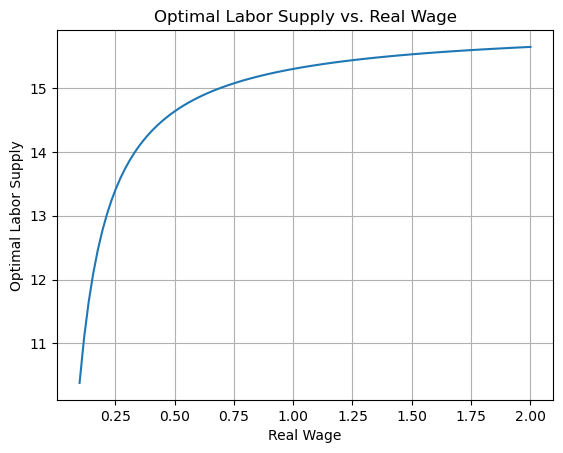

In [93]:
# Define the range of real wage values
omega_values = np.linspace(0.1, 2.0, 100)

# Calculate the corresponding optimal labor supply choices for each wage value
L_star_values = []
for omega in omega_values:

    modelQ1 = ClassQ1()
    modelQ1.par.omega_tilde = (1 - modelQ1.par.tau) * omega
    L_star = modelQ1.optimal_labor_supply()
    L_star_values.append(L_star)

# Plot the relationship between w and L_star
plt.plot(omega_values, L_star_values)
plt.xlabel('Real Wage')
plt.ylabel('Optimal Labor Supply')
plt.title('Optimal Labor Supply vs. Real Wage')
plt.grid(True)
plt.show()   

**Question 1.3**

The method used is similar to that in Question 1.2. We generate different tau values using np.linspace. For each tau value, we calculate the optimal labor supply, government consumption, and worker utility within a loop.

Next, we create empty lists to store all the results.

We proceed to create three plots, with tau plotted on the x-axis.

The outcomes are as follows: labor supply decreases significantly for high tax levels, government consumption exhibits a maximum point, and worker utility decreases for larger tau values. 

Based on our understanding of economic theory, all these findings appear to be reasonable.

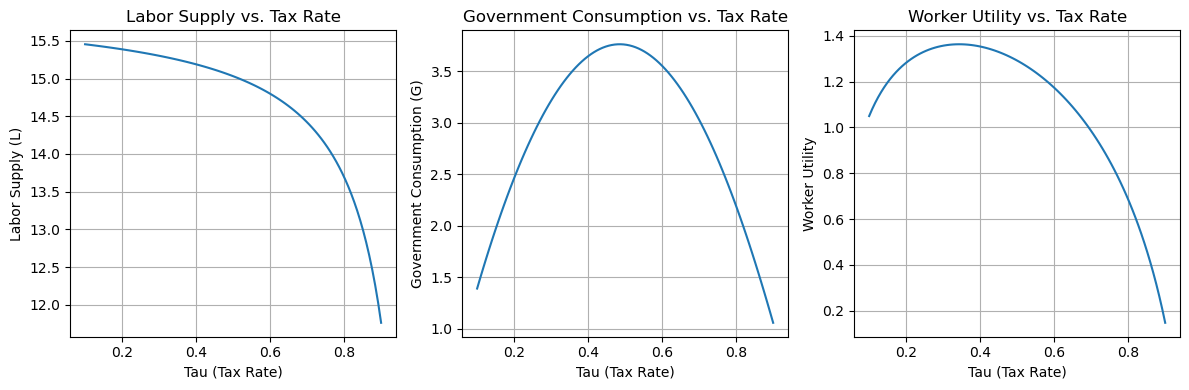

In [94]:
# Define the range of tau values
tau_values = np.linspace(0.1, 0.9, 100)

# Initialize arrays to store the calculated values
L_values = []
G_values = []
utility_values = []

# Calculate the corresponding L, G, and worker utility for each tau value
for tau in tau_values:
    modelQ1 = ClassQ1()
    modelQ1.par.omega_tilde = (1 - tau) * modelQ1.par.omega
    L_star = modelQ1.optimal_labor_supply()
    G = tau * modelQ1.par.omega * L_star * modelQ1.par.omega_tilde
    utility = np.log((modelQ1.par.kappa + (1 - tau) * modelQ1.par.omega * L_star)**modelQ1.par.alpha * G**(1 - modelQ1.par.alpha)) - modelQ1.par.nu * L_star**2
    L_values.append(L_star)
    G_values.append(G)
    utility_values.append(utility)

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Labor Supply vs. Tax Rate
axs[0].plot(tau_values, L_values)
axs[0].set_xlabel('Tau (Tax Rate)')
axs[0].set_ylabel('Labor Supply (L)')
axs[0].set_title('Labor Supply vs. Tax Rate')
axs[0].grid(True)

# Plot 2: Government Consumption vs. Tax Rate
axs[1].plot(tau_values, G_values)
axs[1].set_xlabel('Tau (Tax Rate)')
axs[1].set_ylabel('Government Consumption (G)')
axs[1].set_title('Government Consumption vs. Tax Rate')
axs[1].grid(True)

# Plot 3: Worker Utility vs. Tax Rate
axs[2].plot(tau_values, utility_values)
axs[2].set_xlabel('Tau (Tax Rate)')
axs[2].set_ylabel('Worker Utility')
axs[2].set_title('Worker Utility vs. Tax Rate')
axs[2].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()


**Question 1.4**

As one could observe in Question 1.3, there is a specific value of tau between 0.2 and 0.4 that maximizes worker utility.

To facilitate this calculation, we introduce a new function called calculate_utility() that computes the utility obtained for various tau values.

Subsequently, we utilize the minimize function from scipy to determine the tau value that maximizes worker utility.

The result of our analysis reveals that tau = 0.34 corresponds to the optimal value that maximizes worker utility.

The socially optimal tax rate maximizing worker utility is tau = 0.3432216374906486


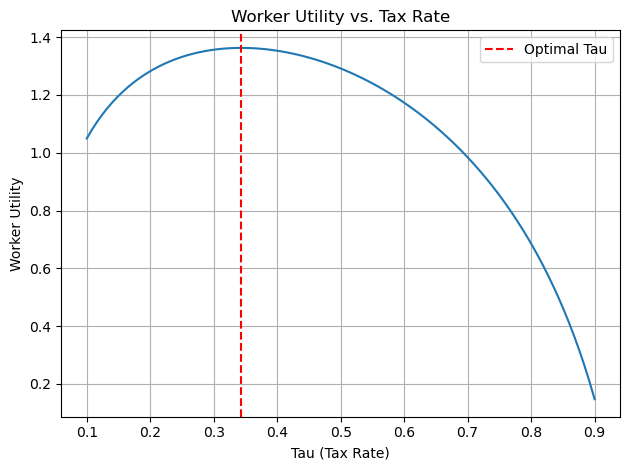

In [95]:
# Function to calculate worker utility for a given tau value
def calculate_utility(tau):
    modelQ1 = ClassQ1()
    modelQ1.par.omega_tilde = (1 - tau) * modelQ1.par.omega
    L_star = modelQ1.optimal_labor_supply()
    G = tau * modelQ1.par.omega * L_star * modelQ1.par.omega_tilde
    utility = np.log((modelQ1.par.kappa + (1 - tau) * modelQ1.par.omega * L_star) ** modelQ1.par.alpha * G ** (1 - modelQ1.par.alpha)) - modelQ1.par.nu * L_star ** 2
    return -utility  # We minimize the negative utility to maximize the original utility

# Find the optimal tau using scipy's minimize_scalar function
result = minimize_scalar(calculate_utility, bounds=(0.01, 1), method='bounded')
optimal_tau = result.x
max_utility = -result.fun

print("The socially optimal tax rate maximizing worker utility is tau =", optimal_tau)

# Plot the relationship between tau and worker utility
utility_values = [-calculate_utility(tau) for tau in tau_values]  # Calculate utility for all tau values
plt.plot(tau_values, utility_values)
plt.axvline(x=optimal_tau, color='r', linestyle='--', label='Optimal Tau')
plt.xlabel('Tau (Tax Rate)')
plt.ylabel('Worker Utility')
plt.title('Worker Utility vs. Tax Rate')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Question 1.5**

Prior to explaining the code, we would like to address some challenges we encountered in the last two questions in Problem 1. We faced difficulties in constructing the functions within the .py file and calling these functions correctly in the Jupyter Notebook. Additionally, we also faced some scope-related issues, preventing the values from being updated correctly. Consequently, we opted to rebuild everything from scratch for question 1.5 and 1.6.

Furthermore, we acknowledge that our code in the next two questions could potentially have been implemented more efficiently using an "if" statement to determine whether set1 or set2 parameters should have been utilized. However, we encountered obstacles in achieving this approach, leading us to construct separate manual solutions for each set of values.
The code and results for set1 can be observed in the first Python cell. Similarly, the code and results for set2 can be observed in the second Python cell.

The function objective_function_q5_set1() calculates the negative utility based on the given parameters. We use negative utility because our goal is to maximize utility, and this is achieved by minimizing negative utility. This process is handled by the maximize_utility_q5_set1() function.

The constraint() function represents the constraint we need to solve for. It is designed as a residual that we aim to minimize. When the residual is equal to 0, both sides of the equation are equal, indicating that the constraint requirement is satisfied.

The remaining of the code utilizes this constraint to minimize the residual for a given government consumption. Finally, the optimal labor hours, the optimal government consumption that meets the specified condition, and the value of the residual are printed.

In both scenarios, we observe that G_residual is approximately 0, indicating that the constraint is satisfied.

Based on the findings, it is evident that in set 1, both the optimal labor hours and government consumption surpass those in set 2.

In [96]:
# Baseline parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * (16 ** 2))
omega = 1.0
tau = 0.3432216374902929  # Tau found in Q1.3
government = 3.4
epsilon = 1

# Set1 parameters
sigma_set1 = 1.001
rho_set1 = 1.001

# Utility function for set1 parameters
def objective_function_q5_set1(L):
    C = kappa + (1 - tau) * omega * L
    value = (((alpha * C ** ((sigma_set1 - 1) / sigma_set1) + (1 - alpha) * government ** (
                (sigma_set1 - 1) / sigma_set1)) ** (sigma_set1 / (sigma_set1 - 1))) ** (1 - rho_set1) - 1) / (
                     1 - rho_set1) - nu * (L ** (1 + epsilon)) / (1 + epsilon)
    return -value  # negative because we want to maximize

# Finding optimal labor hours for set1 parameters
def maximize_utility_q5_set1():
    result_q5_set1 = minimize_scalar(objective_function_q5_set1, bounds=(0, 100), method='bounded')
    return result_q5_set1.x

# Setting up government constraint
def constraint(government, L_optimal):
    return government - tau * omega * L_optimal * (1 - tau) * omega

# Function to minimize
def objective_function(government):
    return abs(constraint(government, L_optimal))

# Bisection method to find the government value
def find_government_value():
    a = 0.0  # Lower bound of government value
    b = 10.0  # Upper bound of government value

    # Find the root using bounded method
    result = minimize_scalar(objective_function, bounds=(a, b), method='bounded')

    if result.success:
        return result.x
    else:
        return None

# Run the code
L_optimal = maximize_utility_q5_set1()
government_value = find_government_value()

if government_value is not None:
    G_residual = constraint(government_value, L_optimal)
    print("With the parameters from set1, we obtain the following results:")
    print("Optimal labor hours:", L_optimal)
    print("Government value:", government_value)
    print("G_residual:", G_residual)
else:
    print("Failed to find a government value that satisfies the constraint.")

With the parameters from set1, we obtain the following results:
Optimal labor hours: 15.247025782108437
Government value: 3.4369912987260807
G_residual: -1.5634495258431969e-06


In [97]:
# Baseline parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * (16 ** 2))
omega = 1.0
tau = 0.3432216374902929  # Tau found in Q1.3
government = 3.4
epsilon = 1

# Set2 parameters
sigma_set2 = 1.5
rho_set2 = 1.5

# Utility function for set2 parameters
def objective_function_q5_set2(L):
    C = kappa + (1 - tau) * omega * L
    value = (((alpha * C ** ((sigma_set2 - 1) / sigma_set2) + (1 - alpha) * government ** (
                (sigma_set2 - 1) / sigma_set2)) ** (sigma_set2 / (sigma_set2 - 1))) ** (1 - rho_set2) - 1) / (
                     1 - rho_set2) - nu * (L ** (1 + epsilon)) / (1 + epsilon)
    return -value  # negative because we want to maximize

# Finding optimal labor hours for set2 parameters
def maximize_utility_q5_set2():
    result_q5_set2 = minimize_scalar(objective_function_q5_set2, bounds=(0, 100), method='bounded')
    return result_q5_set2.x

# Setting up government constraint
def constraint(government, L_optimal):
    return government - tau * omega * L_optimal * (1 - tau) * omega

# Function to minimize
def objective_function(government):
    return abs(constraint(government, L_optimal))

# Bisection method to find the government value
def find_government_value():
    a = 0.0  # Lower bound of government value
    b = 10.0  # Upper bound of government value

    # Find the root using bounded method
    result = minimize_scalar(objective_function, bounds=(a, b), method='bounded')

    if result.success:
        return result.x
    else:
        return None

# Run the code
L_optimal = maximize_utility_q5_set2()
government_value = find_government_value()

if government_value is not None:
    G_residual = constraint(government_value, L_optimal)
    print("With the parameters from set2, we obtain the following results:")
    print("Optimal labor hours:", L_optimal)
    print("Government value:", government_value)
    print("G_residual:", G_residual)
else:
    print("Failed to find a government value that satisfies the constraint.")

With the parameters from set2, we obtain the following results:
Optimal labor hours: 10.50178509199841
Government value: 2.367319116213543
G_residual: 9.967901628549214e-07


**Question 1.6**

As in Q1.5, the code and results for set1 can be observed in the first Python cell. Similarly, the code and results for set2 can be observed in the second Python cell.

We introduce the utility function objective_function_q5_set1() and its corresponding function maximize_utility_q5_set1(tau), which incorporates the tax rate tau as an input. 

We utilize the find_tau_value() function to minimize the objective function from Q1.5, aiming to determine the tax rate that maximizes utility while adhering to the government consumption constraint. 

The results indicate that in set 1, the optimal labor hours, government consumption, and socially optimal tax rate are higher compared to set 2.

In [98]:
# Utility function for set1 parameters
def objective_function_q5_set1(L, tau):
    C = kappa + (1 - tau) * omega * L
    value = (((alpha * C ** ((sigma_set1 - 1) / sigma_set1) + (1 - alpha) * government ** (
                (sigma_set1 - 1) / sigma_set1)) ** (sigma_set1 / (sigma_set1 - 1))) ** (1 - rho_set1) - 1) / (
                     1 - rho_set1) - nu * (L ** (1 + epsilon)) / (1 + epsilon)
    return -value  # negative because we want to maximize

# Function to minimize
def objective_function(tau):
    L_optimal = maximize_utility_q5_set1(tau)
    G_residual = constraint(government, L_optimal)
    return abs(G_residual)

# Finding optimal labor hours for set1 parameters and given tau
def maximize_utility_q5_set1(tau):
    result_q5_set1 = minimize_scalar(objective_function_q5_set1, bounds=(0, 100), args=(tau,), method='bounded')
    return result_q5_set1.x

# Bisection method to find the tau value
def find_tau_value():
    a = 0.0  # Lower bound of tau value
    b = 1.0  # Upper bound of tau value

    # Find the root using bounded method
    result = minimize_scalar(objective_function, bounds=(a, b), method='bounded')

    if result.success:
        return result.x
    else:
        return None

# Run the code
tau_value = find_tau_value()

if tau_value is not None:
    L_optimal = maximize_utility_q5_set1(tau_value)
    government_value = constraint(government, L_optimal)
    print("With the parameters from set1, we obtain the following results:")
    print("Optimal labor hours:", L_optimal)
    print("Government value:", government_value)
    print("G_residual:", G_residual)
    print("Socially optimal tax rate:", tau_value)

With the parameters from set1, we obtain the following results:
Optimal labor hours: 15.08291440164106
Government value: 1.2146580559146969e-06
G_residual: 9.967901628549214e-07
Socially optimal tax rate: 0.4649987397338237


In [99]:
# Utility function for set2 parameters
def objective_function_q5_set2(L, tau):
    C = kappa + (1 - tau) * omega * L
    value = (((alpha * C ** ((sigma_set2 - 1) / sigma_set2) + (1 - alpha) * government ** (
                (sigma_set2 - 1) / sigma_set2)) ** (sigma_set2 / (sigma_set2 - 1))) ** (1 - rho_set2) - 1) / (
                     1 - rho_set2) - nu * (L ** (1 + epsilon)) / (1 + epsilon)
    return -value  # negative because we want to maximize

# Function to minimize
def objective_function(tau):
    L_optimal = maximize_utility_q5_set2(tau)
    G_residual = constraint(government, L_optimal)
    return abs(G_residual)

# Finding optimal labor hours for set2 parameters and given tau
def maximize_utility_q5_set2(tau):
    result_q5_set2 = minimize_scalar(objective_function_q5_set2, bounds=(0, 100), args=(tau,), method='bounded')
    return result_q5_set2.x

# Bisection method to find the tau value
def find_tau_value():
    a = 0.0  # Lower bound of tau value
    b = 1.0  # Upper bound of tau value

    # Find the root using bounded method
    result = minimize_scalar(objective_function, bounds=(a, b), method='bounded')

    if result.success:
        return result.x
    else:
        return None

# Run the code
tau_value = find_tau_value()

if tau_value is not None:
    L_optimal = maximize_utility_q5_set2(tau_value)
    government_value = constraint(government, L_optimal)
    print("With the parameters from set2, we obtain the following results:")
    print("Optimal labor hours:", L_optimal)
    print("Government value:", government_value)
    print("G_residual:", G_residual)
    print("Socially optimal tax rate:", tau_value)

With the parameters from set2, we obtain the following results:
Optimal labor hours: 10.501923705422426
Government value: 1.0326506342630273
G_residual: 9.967901628549214e-07
Socially optimal tax rate: 0.3317942081396159


# Problem 2

**Question 2.1**

Firstly, we set the baseline parameters globally. Some parameters used later will be asserted locally. 

Secondly, we import the model using our class SalonModel

Thirdly, we call upon the function Findmaxprofit, which calculates the profit for different values of kappa. We then iterate over the two values of kappa given and find that the optimal level of kappa, which is 2. 

This can also be found analytcially: 
$\newline$
$l_t=(\frac{(1-\eta)\kappa_t}{w})^{\frac{1}{\eta}}\Leftrightarrow$
$\newline$
$l_t=(\frac{(1-0.5)*1}{1})^{\frac{1}{\frac{1}{2}}}\Leftrightarrow 0.25$
$\newline$
$l_t=(\frac{(1-0.5)*2}{1})^{\frac{1}{\frac{1}{2}}}\Leftrightarrow 1$


In [100]:
#We start by setting our baseline parameters
eta = 0.5
wage = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
rate = (1 + 0.01) ** (1 / 12)
K = 1000
delta = .05
deltarange = (0.01,0.1)
#Calling the model
ModelQ2 = SalonModel(eta, wage, rho, iota, sigma_epsilon, rate, K, delta, deltarange)
kappa_values = [1.0, 2.0]
max_profits = ModelQ2.Findmaxprofit(kappa_values)
print("Maximum Profit:")
for i, kappa in enumerate(kappa_values):
    print(f"For kappa = {kappa}, profit = {max_profits[i]}")



Maximum Profit:
For kappa = 1.0, profit = 0.25
For kappa = 2.0, profit = 1.0


**Question 2.2**

We now make the model dynamic. We start by creating shocks, $\epsilon$. We draw these from a normal distribution with the given values for it. We use a seed in order to repeat the same results again and again. 

We then create function for the dynamic model. It uses the created shocks as input. It is then called in another function, which loops it 120 times and appends the results to a list. Lastly, take the mean of the list.


In [101]:
H, Hpol, Improvement = ModelQ2.Compare()
print(f"The approximate ex ante expected value of the salon (H) is: {H}")


The approximate ex ante expected value of the salon (H) is: 37.04663963753709


**Question 2.3**

We use the same dynamic model as above with the same shocks, yet this time we introduce the policy by changing the parameter l, should certain conditions be met. 

We then call the dynamic model in another function in order to find the difference in profability caused by the policy

In [102]:
H, Hpol, Improvement = ModelQ2.Compare()

print("Comparison Results:")
print(f"The approximate ex ante expected value of the salon (H) is: {H}")
print(f"The approximate ex ante expected value of the salon (H) with policy adjustment is: {Hpol}")

print(f"Improvement = {Improvement}")

if Improvement > 0:
    print("The policy adjustment improves profitability.")
else:
    print("The policy adjustment does not improve profitability.")



Comparison Results:
The approximate ex ante expected value of the salon (H) is: 37.04663963753709
The approximate ex ante expected value of the salon (H) with policy adjustment is: 37.629121329177316
Improvement = 0.5824816916402256
The policy adjustment improves profitability.


**Question 2.4**

We now want to find the optimal value of H_pol given the value of delta. Therefore, we create an objective function, which we want to optimize(minimize). Then we call the optimizer on the created objective function, setting bounds as range of values for delta. 

We use the method "bounded" as this works well when optimizing for a singular parameter

In [103]:
optimal_delta, max_Hpol = ModelQ2.optimize_delta()

print("Optimal Delta:", optimal_delta)
print("Maximum H_pol:", max_Hpol)

Optimal Delta: 0.0949889253198551
Maximum H_pol: 37.78421861689833


**Question 2.5**

We could not come up with any policies

# Problem 3

**Question 3.1**

We implement the Griewank optimization algorithm in the class "GriewankOptimizer". The class takes inputs such as bounds, tolerance, warm-up iterations, and maximum iterations as inputs. The class includes functions for calculating the Griewank function, refining the global optimization, and plotting the results.

The refined_global_optimizer() function performs the optimization by iteratively generating random initial points and updating them based on the Griewank function's values. After a warm-up period, it uses the minimize function from the SciPy library to refine the initial points. The best solution found so far is stored and compared with each new solution obtained. The process continues until the maximum number of iterations is reached or the tolerance level is met.

Finally, the run_optimization() function executes the optimization process, prints the best solution found, and displays a plot showing the progression of the initial guesses (x0) over the iterations.

Iteration 1: x0 = [84.6207 77.4345], x_best = [84.7805 75.4535]
Iteration 2: x0 = [ -13.8698 -196.2267], x_best = [84.7805 75.4535]
Iteration 3: x0 = [-148.9582   38.443 ], x_best = [84.7805 75.4535]
Iteration 4: x0 = [-518.2725  101.4349], x_best = [84.7805 75.4535]
Iteration 5: x0 = [-314.5227 -407.0921], x_best = [84.7805 75.4535]
Iteration 6: x0 = [-417.457  -447.5169], x_best = [84.7805 75.4535]
Iteration 7: x0 = [-207.0706  232.9846], x_best = [84.7805 75.4535]
Iteration 8: x0 = [-169.2402  469.6388], x_best = [84.7805 75.4535]
Iteration 9: x0 = [-357.7441 -467.277 ], x_best = [84.7805 75.4535]
Iteration 10: x0 = [ 33.0681 441.1864], x_best = [84.7805 75.4535]
Iteration 11: x0 = [-285.7507   -0.7259], x_best = [-100.4807   35.5075]
Iteration 12: x0 = [-85.7227  36.0047], x_best = [-94.2006  35.5075]
Iteration 13: x0 = [  88.7362 -129.7732], x_best = [ -3.14   -48.8229]
Iteration 14: x0 = [-504.5831  440.7372], x_best = [ -3.14   -48.8229]
Iteration 15: x0 = [-402.5957  364.1779],

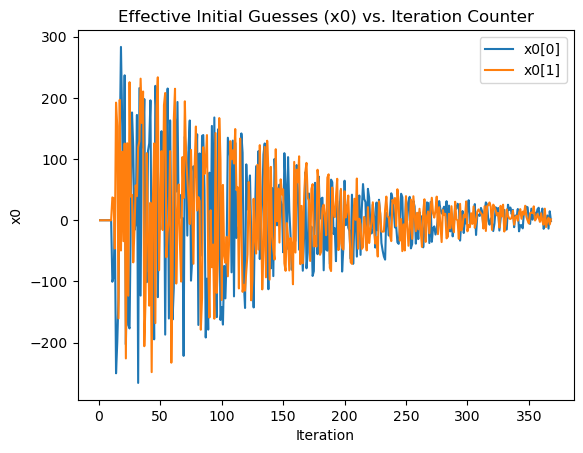

In [104]:
# Create an instance of the GriewankOptimizer class
bounds = [-600, 600]
tol = 1e-8
warmup_iter = 10
max_iter = 1000
optimizer = GriewankOptimizer(bounds, tol, warmup_iter, max_iter)

# Run the optimization
optimizer.run_optimization()

**Question 3.2**

We utilize the refined global optimizer with multi-start in our analysis once again. It is executed for different values of $\underline{K}$, specifically 10 and 100, to compare the number of iterations required to find the global minimum. We also examine different seeds due to the uniform distribution of vector x, as randomness could potentially impact the outcome.

Upon comparing the results between $\underline{K} = 10$ and $\underline{K} = 100$, it is evident that, in general, $\underline{K} = 10$ outperforms the latter. This is indicated by the requirement of fewer iterations to identify the global minimum.

When $\underline{K} = 100$, the increased number of warm-up iterations allows the optimizer to explore the solution space more extensively before applying the refinement strategy. However, overall, this approach proves to be inefficient.

In [105]:
def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1**2 / 4000 + x2**2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tol, warmup_iter, max_iter, seed):
    np.random.seed(seed)
    x_best = None

    for k in range(max_iter):
        x = np.random.uniform(bounds[0], bounds[1], size=2)

        if k >= warmup_iter:
            chi = 0.5 * (2 / (1 + np.exp((k - warmup_iter) / 100)))
            x0 = chi * x + (1 - chi) * x_best
            res = minimize(griewank, x0, method='BFGS', tol=tol)
        else:
            res = minimize(griewank, x, method='BFGS', tol=tol)

        x_best = res.x if k == 0 or res.fun < griewank(x_best) else x_best

        if griewank(x_best) < tol:
            break

    return x_best, k+1

# Settings
bounds = [-600, 600]
tol = 1e-8
max_iter = 1000
K_values = [10,100]
seed_values = [2000, 2001, 2002, 2003, 2004]  # Different seed values to iterate over

# Table headers
headers = ["Seed", "K", "Convergence Iterations", "x_best", "f(x_best)"]

# Table rows
table = []

for seed in seed_values:
    for K in K_values:
        # Run optimizer with current K and seed
        warmup_iter = K
        result, iterations = refined_global_optimizer(bounds, tol, warmup_iter, max_iter, seed)
        f_x_best = griewank(result)

        # Append row to the table
        table.append([seed, K, iterations, result.round(4), f_x_best])

# Print the table
print(tabulate.tabulate(table, headers=headers, tablefmt="grid"))


+--------+-----+--------------------------+-----------+-------------+
|   Seed |   K |   Convergence Iterations | x_best    |   f(x_best) |
+========+=====+==========================+===========+=============+
|   2000 |  10 |                      368 | [-0. -0.] | 0           |
+--------+-----+--------------------------+-----------+-------------+
|   2000 | 100 |                      417 | [-0. -0.] | 1.11022e-16 |
+--------+-----+--------------------------+-----------+-------------+
|   2001 |  10 |                      208 | [-0. -0.] | 0           |
+--------+-----+--------------------------+-----------+-------------+
|   2001 | 100 |                      529 | [-0. -0.] | 1.11022e-16 |
+--------+-----+--------------------------+-----------+-------------+
|   2002 |  10 |                      355 | [-0.  0.] | 0           |
+--------+-----+--------------------------+-----------+-------------+
|   2002 | 100 |                      458 | [-0. -0.] | 1.11022e-16 |
+--------+-----+----